# Track 1:Simple Brownian Motion

Lorem Ipsum

## Modelling random motion of Self-propelled particles

Lorem Ipsum

The following cell shows an example of using the code base to create a group of simpl self-propelled randomly moving particles with pygame. The `Simulation` class creates an arena and N particles inside. We define the type of these particles/agents as "brownian-selfpropelled". After initialization we set the noise parameters (defining the motion of each agent). The noise on the agents can be normal with parameters mean and standard deviation or uniform with parameters minimum and maximum value. Agents will move with a fixed constant absolute velocity `v_max`

Upon starting the simulation instance in each timestep the position and orientation of the particles are updated according to an update rul (`update_forces` and `update` method of `AgentBrownianSelfPropelled` class.)

In [ ]:
#first we install the package (in case it is not done yet) and import the Simulation class
%pip install -e .
from pygmodw23.sims import Simulation

In [2]:
# Simulation Parameters
# simulation time
T = 1000
# number of agents
N = 30
# path trail lengths
memory_length = T
# arena
width = height = 500
window_pad = 30

# Create a simulation instance
test_simulation = Simulation(N=N, T=T, agent_type="brownian-selfpropelled", framerate=60,
                            width=width, height=height, window_pad=window_pad)

# Change Agent Parameters
# a.) type of noise ("normal" or "uniform")
# b.) noise parameters (min, max) or (mean, std) of movement noise
# c.) particle speed
for agent in test_simulation.agents:
    agent.noise_type = "uniform"  # or "normal"
    agent.noise_params = (-0.5, 0.5)  # (min, max) or (mean, std)
    agent.v_max = 0.5              # constant maximum absolute velocity
    agent.position = [window_pad + int(width/2), window_pad + int(height/2)]
    # colorcoding orientation
    agent.change_color_with_orientation = False

# showing colorcoded trails
test_simulation.memory_length = memory_length


# Start the simulation
test_simulation.start()

Running simulation start method!
Starting main simulation loop!
2023-06-05_14-59-04.010827 Total simulation time:  35.311446


## Brownian non-selfpropelled particles
In case of particles that are not self propelled the velocity of the agents are driven purely by noise. We can use this model with the `brownian` agents when we create the simulation instance. In this case the noise on the orientation and velcoity of agents are both normal and can be controlled by the `noise_params_th` and `noise_params_v` parameters. Here is an example:

In [3]:
from numpy import pi
# Simulation Parameters
# simulation time
T = 1000
# number of agents
N = 30
# path trail lengths
memory_length = T
# arena
width = height = 500
window_pad = 30

# Create a simulation instance
test_simulation = Simulation(N=N, T=T, agent_type="brownian", framerate=60,
                            width=width, height=height, window_pad=window_pad)

# Change Agent Parameters
# a.) type of noise ("normal" or "uniform")
# b.) noise parameters (min, max) or (mean, std) of movement noise
# c.) particle speed
for agent in test_simulation.agents:
    agent.noise_params_th = (0, 0.5*pi)   # (mean, std) normal
    agent.noise_params_v = (0, 1)      # (mean, std) normal
    agent.v_max = 0.5                  # constant maximum absolute velocity
    agent.position = [window_pad + int(width/2), window_pad + int(height/2)]
    # colorcoding orientation
    agent.change_color_with_orientation = True

# showing colorcoded trails
test_simulation.memory_length = memory_length


# Start the simulation
test_simulation.start()

Running simulation start method!
Starting main simulation loop!
2023-06-05_14-59-54.213560 Total simulation time:  43.957787


## Saving modelling data as HDF5

Saving modelling data is essential to analyze the behavior of a model and to distribute the results. Keeping your data tranparent and your experiments reproducible means that you not only provide generated data, but you do so in a format that is widely accepted. HDF5 is a data format mostly used in sciences to store large amounts of data and to carry out analysis efficiently. In the following short demo we will save some resulting data of the `test_siulation` simulation instance. This data is currently saved in the memory after the simulation has been run and can be accessed as attributes of the `Simulation` class. As an example, we defined the `memory_length` variable in the previous block to be equal to the simulation time. After this, the trails of our particles has been shown. In the background the simulation class saves the orientation and position data (x, y) of each agent in an array and visualizes the paths from there. These can be accessed as `test_simulation.ori_memory` and `test_simulation.pos_memory`.

**Question:**  What do you think the shape of these arrays are going to be?

Now let's import h5py that allows one to easily save and read numpy arrays to/from HDF5 files. We also import matplotlib for later visualization.

In [4]:
# Import h5py and save ori_memory to hdf5 file
import h5py

Let's save our arrays into a single file.

In [5]:
# Create a single H5 file to contain our arrays
h5f = h5py.File('agent_trails.h5', 'w')

# Save orientation and position memory (trails) into different datasets in the same file
h5f.create_dataset('orientation_memory', data=test_simulation.ori_memory)
h5f.create_dataset('position_memory', data=test_simulation.pos_memory)

# Close the file
h5f.close()

Let's check your project folder (in which this notebook is located). You should be able to see a new `agent_trails.h5` file. Now let's read back the data and visualize it.

In [6]:
# Read saved data from HDF5 file
h5f = h5py.File('agent_trails.h5','r')

# Read individual datasets into python variables
ori_memory_readback = h5f['orientation_memory'][:]
pos_memory_readback = h5f['position_memory'][:]

# close file after read
h5f.close()

# check if reading data was successful by printing array shapes 
print(f"Shape of readback orientation memory: {ori_memory_readback.shape}")
print(f"Shape of readback position memory: {pos_memory_readback.shape}")
# Was formatting with f-strings new for you? Check this out: https://realpython.com/python-f-strings/

Shape of readback orientation memory: (30, 1000)
Shape of readback position memory: (30, 2, 1000)


**Question:** Was your guess about the shape of these arrays correct or similar? Identify why exactly these are the shapes according to the parameters you have used to run the simulation.

## Visualizing saved data

Now let's visualize the data with the matplotlib package. Here is how the orientation changed of the 0th agent during the simulation:

Text(0.5, 1.0, 'Orientation of agent #0 over time')

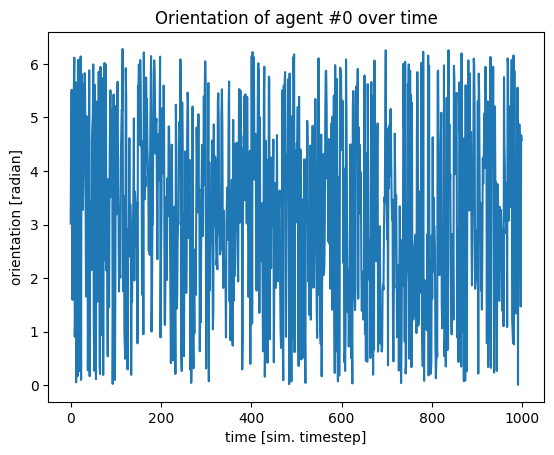

In [7]:
# Import matplotlib for visualization
%matplotlib inline
import matplotlib.pyplot as plt
# Visualizing orientation of the 0th agent over the experiment
# Choosing agent ID
chose_agent = 0
# Plotting
plt.figure()
plt.plot([t for t in range(T)], ori_memory_readback[chose_agent, :])
plt.xlabel("time [sim. timestep]")
plt.ylabel("orientation [radian]")
plt.title(f"Orientation of agent #{chose_agent} over time")

And here is the trajectory of the same agent recovered from position data:

Text(0.5, 1.0, 'Position of agent #6 over time')

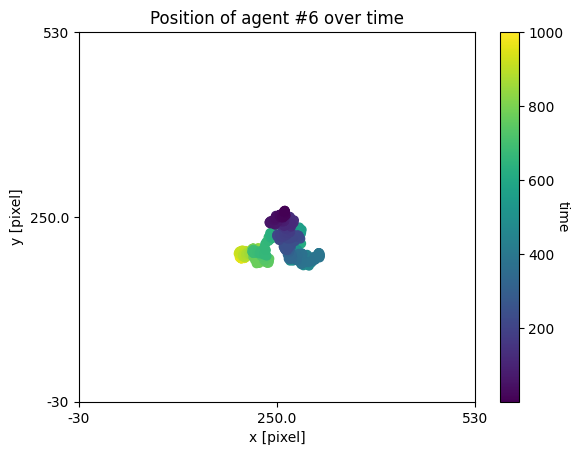

In [8]:
# Visualizing trajectory from position data of the 0th agent over the experiment
# Choosing agent ID
chose_agent = 6
# Plotting
plt.figure()
plt.scatter(pos_memory_readback[chose_agent, 0, :], pos_memory_readback[chose_agent, 1, :], c=[t for t in range(T, 0, -1)])
plt.xlim(0, width + window_pad*2)
plt.ylim(0, height + window_pad*2)
plt.xticks([0, width/2 + window_pad, width + window_pad*2], [-window_pad, width/2, width+window_pad])
plt.yticks([0, height/2 + window_pad, height + window_pad*2], [-window_pad, height/2, height+window_pad])
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
# Creating colorbar to show temporal order of data points
cbar = plt.colorbar()
cbar.set_label('time', rotation=270)
plt.title(f"Position of agent #{chose_agent} over time")

## Excercises for Track 1.:
Here we will experiment with the qualitative effect of different noise parameters on the system.
  - a.) Increase the stochasiticity on the system with the above code snippet by changing the minimum and maximum noise values in `agent.noise_params`. What can you say about the qualitative effects on the system? (disperison, coverage)
  - b.) Now change the noise type to `normal` with mean=0 and set the standard deviation to 0, 0.1, 0.25, 0.5, 1. Observe the effect of this kind of noise on the system. What do you think is different with this type of noise?
  - c.) Do a very short literature search and reason which type of noise would be more reasonable to model brownian motion of moving particles? why?
  - d.) There are several arrays saved in memory in the `Simulation` class during run.  and . These are `ori_memory` (orientation), `pos_memory` (position, x, y), `vx_memory` (velocity along x axis), `vy_memory` (velocity along y axis), `iid_memory` (inter-individual distance (distance between agents)). Write a script in this notebook that saves all of these from a simulation instance to a single H5 file.
  - e.) Usually we want to do parameter sweeps (changing parameters in a range gradually) for model simulations automatically. Write a script that changes the standard deviation of the normal noise on the system according to b.) but automatically and saves the resulting data in 5 different files named `autosweep_normal_S<standard deviation value without dots>.h5`. For example, `autosweep_normal_S0.h5` or `autosweep_normal_S025.h5`.
  - f.) write a script that reads back the generated files, calculates the mean and standard deviation over time of the inter-timestep orientation difference (difference of orientation between step t and t+1 for all t). Take the mean values across all agents. Plot the resulting values and see if you get back the theoretical values. What might cause the differences you see?

## Solutions for Excercises in Track 1